<a href="https://colab.research.google.com/github/bajajraj/FI824AmazonReviewAnalysis/blob/main/FI824FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import gzip
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import string
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

import nltk
import re
import warnings
import matplotlib.pyplot as plt
%matplotlib inline

warnings.filterwarnings('ignore')
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
json_data = "/content/drive/MyDrive/Luxury_Beauty.json"

In [4]:
def return_dict(file):
  yield eval(file)

def parse(path):
  g = gzip.open(path, 'rb')
  return map(return_dict, g)
  
def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [5]:
starting_df = pd.read_json(json_data, lines=True)

In [6]:
luxury_df = starting_df.copy(deep=True)

In [7]:
luxury_df.head()

,overall,vote,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,style,image
0,2,3,True,"06 15, 2010",A1Q6MUU0B2ZDQG,B00004U9V2,D. Poston,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,1276560000,NaN,NaN
1,5,14,True,"01 7, 2010",A3HO2SQDCZIE9S,B00004U9V2,chandra,"Believe me, over the years I have tried many, ...",Best hand cream ever.,1262822400,NaN,NaN
2,5,NaN,True,"04 18, 2018",A2EM03F99X3RJZ,B00004U9V2,Maureen G,Great hand lotion,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
3,5,NaN,True,"04 18, 2018",A3Z74TDRGD0HU,B00004U9V2,Terry K,This is the best for the severely dry skin on ...,Five Stars,1524009600,{'Size:': ' 3.5 oz.'},NaN
4,5,NaN,True,"04 17, 2018",A2UXFNW9RTL4VM,B00004U9V2,Patricia Wood,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,1523923200,{'Size:': ' 3.5 oz.'},NaN


In [8]:
# Removing unwanted columns which are the style, image, reviewerID, reviewTime, reviewerName, unixReviewTime, and verified
luxury_df = luxury_df[['overall', 'vote', 'asin', 'reviewText', 'summary']]

In [9]:
luxury_df.head()

,overall,vote,asin,reviewText,summary
0,2,3,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5,14,B00004U9V2,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5,NaN,B00004U9V2,Great hand lotion,Five Stars
3,5,NaN,B00004U9V2,This is the best for the severely dry skin on ...,Five Stars
4,5,NaN,B00004U9V2,The best non- oily hand cream ever. It heals o...,I always have a backup ready.


In [10]:
luxury_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574628 entries, 0 to 574627
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     574628 non-null  int64 
 1   vote        103689 non-null  object
 2   asin        574628 non-null  object
 3   reviewText  574228 non-null  object
 4   summary     574445 non-null  object
dtypes: int64(1), object(4)
memory usage: 21.9+ MB


In [11]:
vector = np.array(luxury_df['overall'])

# converting vector array of helpful to an int value as the list contains both values which are same.
for i in range(len(vector)):
    if 1 <= vector[i] <=2:
        vector[i] = str(vector[i])
    elif vector[i] == 3:
        vector[i] = str(vector[i])
    else:
        vector[i] = str(vector[i])

luxury_df['overall'] = vector.tolist()

luxury_df.head()


,overall,vote,asin,reviewText,summary
0,2,3,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work
1,5,14,B00004U9V2,"Believe me, over the years I have tried many, ...",Best hand cream ever.
2,5,NaN,B00004U9V2,Great hand lotion,Five Stars
3,5,NaN,B00004U9V2,This is the best for the severely dry skin on ...,Five Stars
4,5,NaN,B00004U9V2,The best non- oily hand cream ever. It heals o...,I always have a backup ready.


In [12]:
# Converting overall review to sub categories for better regression
luxury_df["classes"] = luxury_df["overall"]
luxury_df["classes"].replace({5.0: "positive",4.0:"positive",3.0:"negative",2.0:"negative",1.0:"negative"}, inplace=True)
luxury_df.head()

,overall,vote,asin,reviewText,summary,classes
0,2,3,B00004U9V2,"I bought two of these 8.5 fl oz hand cream, an...",dispensers don't work,negative
1,5,14,B00004U9V2,"Believe me, over the years I have tried many, ...",Best hand cream ever.,positive
2,5,NaN,B00004U9V2,Great hand lotion,Five Stars,positive
3,5,NaN,B00004U9V2,This is the best for the severely dry skin on ...,Five Stars,positive
4,5,NaN,B00004U9V2,The best non- oily hand cream ever. It heals o...,I always have a backup ready.,positive


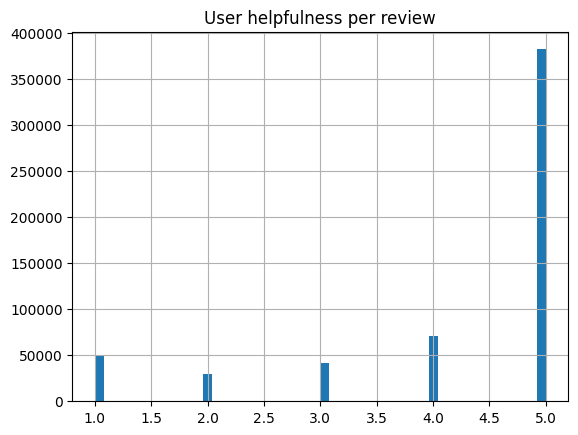

In [13]:
%matplotlib inline 
luxury_df["overall"].hist(bins=50)
plt.title("User helpfulness per review")
plt.show()

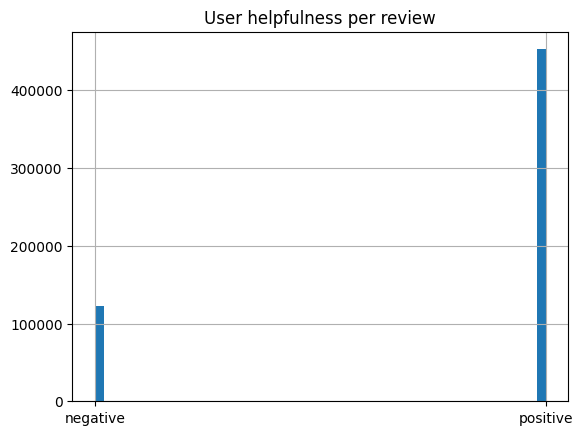

In [14]:
%matplotlib inline 
luxury_df["classes"].hist(bins=50)
plt.title("User helpfulness per review")
plt.show()

In [15]:
luxury_df = luxury_df.loc[luxury_df['reviewText'].apply(lambda x: isinstance(x, float)) == False]

In [16]:
luxury_df = luxury_df.dropna(subset=['reviewText'])

In [17]:
starting_review = luxury_df['reviewText'].to_list()
starting_review = starting_review[0]

In [18]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
def remove_punctuation(text):
    '''
    This function removes the punctuation marks so that the data doesnot takes them into account.
    '''
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [19]:
luxury_df['reviewText']= luxury_df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))

In [20]:
print('Example of review before removing punctuation - ', starting_review)
current_review = luxury_df['reviewText'].to_list()
current_review = current_review[0]
print('Example of review after removing punctuation - ', current_review)

Example of review before removing punctuation -  I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work.  The hand cream is wonderful, but very thick, so I don't see I can get much out by shaking it out, since the dispensers seem to be non-operable.
Example of review after removing punctuation -  i bought two of these 85 fl oz hand cream and neither of the dispensers work  the hand cream is wonderful but very thick so i dont see i can get much out by shaking it out since the dispensers seem to be nonoperable


In [21]:
stemmer = PorterStemmer()
# This code is taken from multiple sources and combined to get the desired output
# stop words are the words like "the, I, our etc"
words = stopwords.words("english") 
luxury_df['cleaned_reviews'] = luxury_df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())

In [23]:
print('Example of review before removing punctuation - ', starting_review)
current_review = luxury_df['cleaned_reviews'].to_list()
current_review = current_review[0]
print('Example of review after removing stop words - ', current_review)

Example of review before removing punctuation -  I bought two of these 8.5 fl oz hand cream, and neither of the dispensers work.  The hand cream is wonderful, but very thick, so I don't see I can get much out by shaking it out, since the dispensers seem to be non-operable.
Example of review after removing stop words -  bought two fl oz hand cream neither dispens work hand cream wonder thick dont see get much shake sinc dispens seem nonoper


In [34]:
!pip install -q -U "tensorflow-text==2.11.*"

In [35]:
!pip install -q tf-models-official==2.11.0

In [31]:
print("TensorFlow version: ", tf.__version__)

TensorFlow version:  2.12.0


In [36]:
import os
import shutil

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
from official.nlp import optimization  # to create AdamW optimizer

import matplotlib.pyplot as plt

tf.get_logger().setLevel('ERROR')

NotFoundError: ignored